#### Cody Kaminski
#### 12/15/2022
#### Sentiment Analysis of Tweets
#### The purpose of this project is to analyze the sentiment of tweets

#### What is the sentimentality of the discussion about the world cup?

#### Import libraries

In [209]:
import tweepy
import keys
import preprocessor as p
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

#### Initialize client

In [210]:
CLIENT = tweepy.Client(bearer_token = keys.bearer_token, wait_on_rate_limit = True)

#### Read tweets

In [211]:
tweets = []

p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.HASHTAG, p.OPT.MENTION)

for page in tweepy.Paginator(CLIENT.search_recent_tweets, query = "world cup -is:retweet lang:en").flatten(limit = 250):
    tweets.append(p.clean(page.text))

Unauthorized: 401 Unauthorized
Unauthorized

#### Donut chart of tweet sentimentality

In [202]:
sentimentNames = ["Positive", "Negative", "Neutral"]
sentimentValues = [0, 0, 0]
sentimentColors = ["blue", "red", "gray"]

for tweet in tweets:
    polarity = TextBlob(tweet).sentiment.polarity
    
    if polarity > 0:
        sentimentValues[0] = sentimentValues[0]+1
    elif polarity < 0:
        sentimentValues[1] = sentimentValues[1]+1
    else:
        sentimentValues[2] = sentimentValues[2]+1

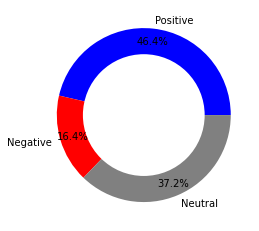

In [203]:
plt.pie(x = sentimentValues, colors = sentimentColors, labels = sentimentNames, autopct = "%1.1f%%", pctdistance = 0.85)
plt.gcf().gca().add_artist(plt.Circle((0, 0), 0.70, fc = "white"))

#### Word cloud of 20 most used words in tweets

In [204]:
stops = stopwords.words("english")
tweetsString = ""

for tweet in tweets:
    for word in [word for word in word_tokenize(tweet) if not word.lower() in stops]:
        tweetsString = f"{tweetsString} {word}"

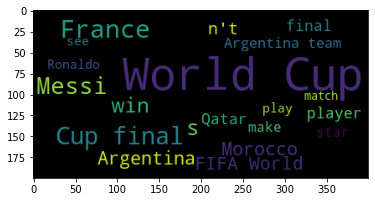

In [205]:
plt.imshow(WordCloud(max_words = 20).generate(tweetsString))

#### The plurality of the discussion about the world cup is positive.